# fiducial VVDS, Nov. nights to N536

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd
from skipper import observe

In [ ]:
plt.rcParams['font.size']=20

In [3]:
sys.path.append('../scripts')

In [4]:
import make_pointings
import sigjson_f2021b

In [5]:
mastercat = sigjson_f2021b.load_mastercat('n536')

In [6]:
datelist_vvdsxmm_n536 = [(2021,11,ix) for ix in np.arange(24,31)]
datelist_vvdsxmm_n536 += [(2021,12,ix) for ix in np.arange(1,5)]
nightslot_vvdsxmm_n536 = [1 for ix in np.arange(24,31)]
nightslot_vvdsxmm_n536 += [1 for ix in np.arange(1,5)]
priorities_n536 = {'VVDSearly':0, 'VVDSlate':1, 'VVDS':1, 'XMM':2}    

In [7]:
datelist_vvdsxmm_n702 =  [(2021,9,ix) for ix in np.arange(10, 14)] 
#datelist_vvdsxmm_n702 += [(2021,11,ix) for ix in np.arange(24,31)]
nightslot_vvdsxmm_n702 = [2 for ix in np.arange(10,14)]
#nightslot_vvdsxmm_n702 += [1 for ix in np.arange(24,31)]
priorities_n702 = {'VVDSearly':0, 'VVDSlate':1,'VVDS':1, 'XMM':2}    

In [8]:
datelist_cosmosgama_n536 = [(2021,12,31), (2021,1,1)]
datelist_cosmosgama_n536 += [(2021,1,ix) for ix in np.arange(3,5)]
datelist_cosmosgama_n536 += [(2021,1,ix) for ix in np.arange(6,8)]
datelist_cosmosgama_n536 += [(2021,1,ix) for ix in np.arange(9,12)]
datelist_cosmosgama_n536 += [(2022,1,ix) for ix in np.arange(25, 32)]

nightslot_cosmosgama_n536 = [2,2]
nightslot_cosmosgama_n536 += [2 for ix in np.arange(3,5)]
nightslot_cosmosgama_n536 += [2 for ix in np.arange(6,8)]
nightslot_cosmosgama_n536 += [2 for ix in np.arange(9,12)]
nightslot_cosmosgama_n536 += [2 for ix in np.arange(25,32)]

priorities_cosmosgama_n536 = {'COSMOS':0, 'GAMA':1}     

In [9]:
print(f'{len(datelist_vvdsxmm_n536)} half-nights in VVDS/XMM N536')
print(f'{len(datelist_vvdsxmm_n702)} half-nights in VVDS/XMM N702')
print(f'{len(datelist_cosmosgama_n536)} half-nights in COSMOS/GAMA N536')


11 half-nights in VVDS/XMM N536
4 half-nights in VVDS/XMM N702
16 half-nights in COSMOS/GAMA N536


In [77]:
datelist_l =  [(2021,9,ix) for ix in np.arange(10, 14)] 
datelist_l += [(2021,11,ix) for ix in np.arange(24,31)]
datelist_l += [(2021,12,ix) for ix in np.arange(1,5)]
datelist_l += [(2021,12,31), (2022,1,1)]
datelist_l += [(2022,1,ix) for ix in np.arange(3,5)]
datelist_l += [(2022,1,ix) for ix in np.arange(6,8)]
datelist_l += [(2022,1,ix) for ix in np.arange(9,12)]
datelist_l += [(2022,1,ix) for ix in np.arange(25, 32)]
nightslot_l = [2 for ix in np.arange(10,14)]
nightslot_l += [1 for ix in np.arange(24,31)] # 0: full, 1: first half, 2: second half
nightslot_l += [1 for ix in np.arange(1,5)]
nightslot_l += [2,2]
nightslot_l += [2 for ix in np.arange(3,5)]
nightslot_l += [2 for ix in np.arange(6,8)]
nightslot_l += [2 for ix in np.arange(9,12)]
nightslot_l += [2 for ix in np.arange(25,32)]
priorities_l = {'VVDS':0, 'XMM':1}     

In [78]:
ctio = observe.ObservingSite ()

In [93]:
moon_stats = np.zeros ( [2, len(datelist_l)] )
for ix in range(len(datelist_l)):
    night_start, night_end = ctio.get_sunriseset ( *datelist_l[ix] )
    if nightslot_l[ix] == 0:
        print('[predict] night slot: Full night')
        obs_start = night_start
        obs_end = night_end
    elif nightslot_l[ix] == 1:
        print('[predict] night slot: First half')
        obs_start = night_start
        obs_end = obs_start + 0.5*(night_end-obs_start)
    else:
        print('[predict] night slot: Second half')
        obs_start = night_start + 0.5*(night_end-night_start)
        obs_end = night_end 
    
    illum, maxalt = ctio.track_moon ( obs_start, obs_end )
    moon_stats[0,ix] = illum
    moon_stats[1,ix] = maxalt

[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
happy new years
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict]

In [94]:
axassn = []
for dx in datelist_l:
    if dx[1] == 9:
        axassn.append(0)
    elif (dx[1]==11) or ((dx[1]==12)and(dx[2]<15)):
        axassn.append(1)
    else:
        axassn.append(2)
axassn = np.asarray(axassn)        

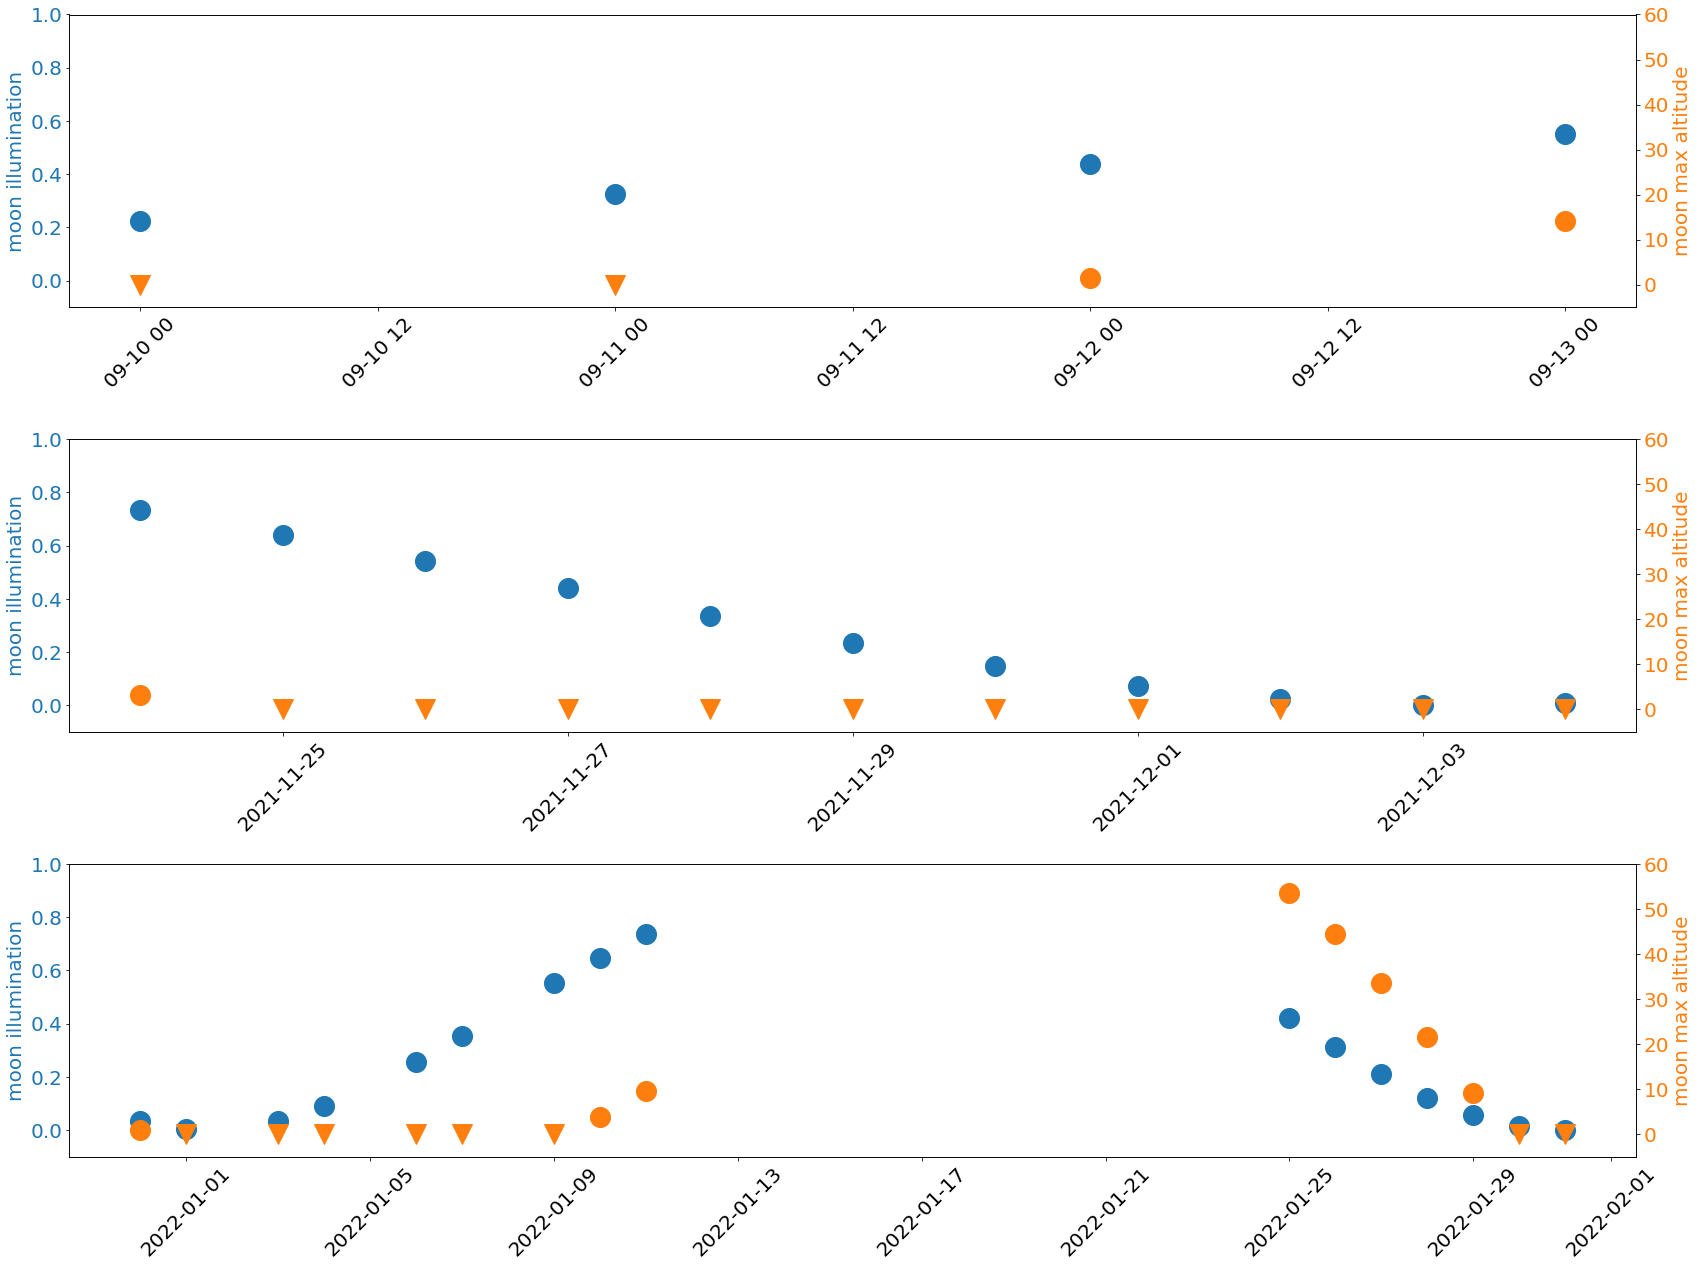

In [102]:
fig, axarr = plt.subplots(3,1,figsize=(24,18))

is_set = moon_stats[1] == 0
for idx in range(len(axarr)):
    ax = axarr[idx]
    
    cdl = np.array(datelist_l)[axassn==idx]
    dplot = np.array([ datetime.datetime(*dx) for dx in cdl])
    ax.plot( dplot, moon_stats[0,axassn==idx], 'o',
           markersize=20)
    
    ax2 = ax.twinx ()
    
    
    ax2.plot ( dplot[~is_set[axassn==idx]], moon_stats[1,(axassn==idx)&~is_set], 
              'o', markersize=20, color='C1', )
    ax2.plot ( dplot[is_set[axassn==idx]], moon_stats[1,(axassn==idx)&is_set], 
              'v', markersize=20, color='C1', )    
    ax.set_ylim(-0.1,1.)
    ax2.set_ylim(-5.,60.)
    ax.tick_params(axis='x', labelrotation = 45)
    ax.tick_params(axis='y', labelcolor='C0')
    ax2.tick_params(axis='y', labelcolor='C1')
    ax.set_ylabel('moon illumination', color='C0')
    ax2.set_ylabel('moon max altitude', color='C1')
plt.tight_layout ()
plt.savefig('/Users/kadofong/Downloads/2021B_moonstats.png')

In [16]:
obs_start, obs_end

(datetime.datetime(2021, 9, 11, 4, 40, tzinfo=<UTC>),
 datetime.datetime(2021, 9, 11, 9, 45, tzinfo=<UTC>))

In [19]:
observe.Time(obs_start)

<Time object: scale='utc' format='datetime' value=2021-09-11 04:40:00>

(0.22267802071295534, 0.0)

In [11]:
iqt_n536 = sigjson_f2021b.predict_f2021b ( 'n536', datelist_vvdsxmm_n536, 
                                          nightslot_vvdsxmm_n536,
                                          priorities=priorities_n536,
                                          pad_last_hour=False)

[predict] night slot: First half
obsStart: 2021/11/24 09:36 PM Santiago
          2021/11/24 07:36 PM ET
          2021/11/25 12:36 AM UTC
obsEnd:   2021/11/25 01:30 AM Santiago
          2021/11/24 11:30 PM ET
          2021/11/25 04:30 AM UTC
Minimum airmass available: 1.17023717795659

==> 20211125_00, 1440.000000000003s available
900.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
Minimum airmass available: 1.141632207211535

==> 20211125_01, 3600.0s available
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
Minimum airmass available: 1.1018997012771004

==> 20211125_02, 3600.0s available
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
Minimum airmass available: 1.1092687389168665

==> 20211125_03, 3600.0s available
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
Minimum airmass available: 1.194574434039264

==> 20211125_04, 1799.9999999999807s available
0.0s filled by priority=1.0

[predict] night slot: First half
obsStart: 2021/12/02 09:44 PM Santiago
          2021/12/02 07:44 PM ET
          2021/12/03 12:44 AM UTC
obsEnd:   2021/12/03 01:33 AM Santiago
          2021/12/02 11:33 PM ET
          2021/12/03 04:33 AM UTC
Minimum airmass available: 1.2380117312502443

==> 20211203_00, 960.0000000000047s available
900.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
Minimum airmass available: 1.1578009770706301

==> 20211203_01, 3600.0s available
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
Minimum airmass available: 1.1533468444734436

==> 20211203_02, 3600.0s available
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
Minimum airmass available: 1.2207304738542286

==> 20211203_03, 3600.0s available
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
Minimum airmass available: 1.4021108328669116

==> 20211203_04, 1979.99999999998s available
0.0s filled by priority=1

/Users/kadofong/work/merian/skipper/python/skipper/observe.py:387: UserWarning: Queue empty at 20211205_01
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:387: UserWarning: Queue empty at 20211205_02
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:387: UserWarning: Queue empty at 20211205_03
  warnings.warn (f'Queue empty at {hstr}')



!!! Nothing to queue !!!
Minimum airmass available: 40.91544853891452

==> 20211205_04, 2009.9999999999752s available
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
!!! Nothing to queue !!!


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:387: UserWarning: Queue empty at 20211205_04
  warnings.warn (f'Queue empty at {hstr}')


In [12]:
iqt_n702 = sigjson_f2021b.predict_f2021b ( 'n702', 
                                          datelist_vvdsxmm_n702, 
                                          nightslot_vvdsxmm_n702,
                                          priorities=priorities_n702,
                                          pad_last_hour=False)

[predict] night slot: Second half
obsStart: 2021/09/11 01:40 AM Santiago
          2021/09/11 12:40 AM ET
          2021/09/11 04:40 AM UTC
obsEnd:   2021/09/11 06:45 AM Santiago
          2021/09/11 05:45 AM ET
          2021/09/11 09:45 AM UTC
Minimum airmass available: 1.1698901953466772

==> 20210911_04, 1200.0000000000086s available
1200.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
Minimum airmass available: 1.17037504453209

==> 20210911_05, 3600.0s available
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
Minimum airmass available: 1.1351915025713073

==> 20210911_06, 3600.0s available
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
Minimum airmass available: 1.1015408262970694

==> 20210911_07, 3600.0s available
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
Minimum airmass available: 1.1124555901994286

==> 20210911_08, 3600.0s available
0.0s filled by priority=1.0 object

In [13]:
iqt_cosmosgama_n536 = sigjson_f2021b.predict_f2021b ( 'n536', datelist_cosmosgama_n536, 
                                          nightslot_cosmosgama_n536,
                                          priorities=priorities_cosmosgama_n536,
                                          field="COSMOSGAMA",
                                          pad_last_hour=False)

happy new years
[predict] night slot: Second half
obsStart: 2022/01/01 01:47 AM Santiago
          2021/12/31 11:47 PM ET
          2022/01/01 04:47 AM UTC
obsEnd:   2022/01/01 05:33 AM Santiago
          2022/01/01 03:33 AM ET
          2022/01/01 08:33 AM UTC
Minimum airmass available: 1.3565382126206962
(780s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.2020395058860962

==> 20220101_05, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1503983483738647

==> 20220101_06, 3600.0s available
3600s filled by priority=0.0 objects
0s filled by priority=1.0 objects
Minimum airmass available: 1.144864094882225

==> 20220101_07, 3600.0s available
3600s filled by priority=0.0 objects
0s filled by priority=1.0 objects
Minimum airmass available: 1.143015683289451

==> 20220101_08, 1979.9999999999704s available
1800s filled by priority=0.0 objects
0s filled by priority=1.0 objects
[predict] night sl

Minimum airmass available: 1.1471235583756207

==> 20210112_06, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1554036979797624

==> 20210112_07, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1448553155869192

==> 20210112_08, 2579.9999999999586s available
0s filled by priority=0.0 objects
1800s filled by priority=1.0 objects
[predict] night slot: Second half
obsStart: 2022/01/26 01:55 AM Santiago
          2022/01/25 11:55 PM ET
          2022/01/26 04:55 AM UTC
obsEnd:   2022/01/26 05:57 AM Santiago
          2022/01/26 03:57 AM ET
          2022/01/26 08:57 AM UTC
Minimum airmass available: 1.199163817483324
(270s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.1512696154138997

==> 20220126_05, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1615

In [14]:
mastercat_n536 = sigjson_f2021b.load_mastercat ('n536')
mastercat_n702 = sigjson_f2021b.load_mastercat ('n702')
mastercat_cosmosgama = sigjson_f2021b.load_mastercat_cosmos ()

In [15]:
plt.rcParams['font.size'] = 15

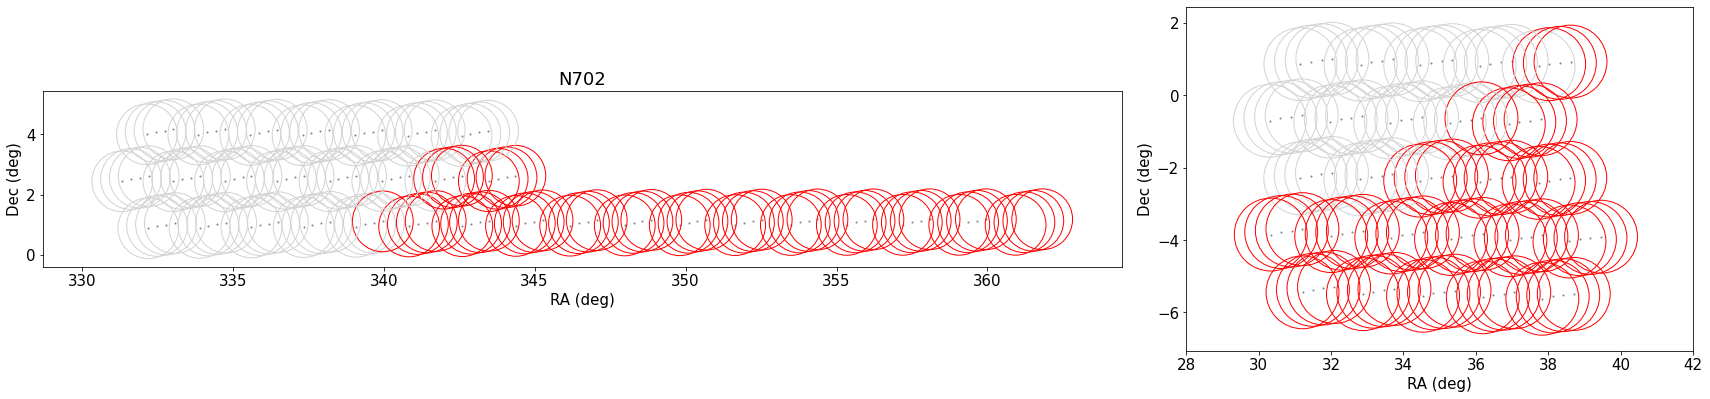

In [16]:
fig = plt.figure(figsize=(24,8))
fov_radius = (3.18/np.pi)**0.5
shp = (1,3)
ax0 = plt.subplot2grid(shp, (0,0), colspan=2)
ax1 = plt.subplot2grid(shp, (0,2) )
for name,row in mastercat_n702.iterrows():
    qrow = iqt_n702.loc[name]
    if (row.RA > 50):
        ax = ax0
        ra = row.RA
    elif row.RA < 10:
        ax = ax0
        ra = row.RA + 360.
    else:
        ax = ax1
        ra = row.RA
    if qrow.is_queued:
        cval = np.where(iqt_n702.sort_values('qstamp').index == name)[0][0]
        ec= 'r' #plt.cm.magma( cval/iqt_n702.shape[0] )
    else:
        ec='lightgray'
    patch = patches.Circle ( (ra, row.dec), fov_radius, ec=ec, #plt.cm.viridis((hr+5)/10.), 
                            fc='None')
    
    ax.add_patch(patch)

mask = (mastercat.RA > 50)
ax0.scatter(mastercat.loc[mask,'RA'], mastercat.loc[mask,'dec'], s=1, color='grey')
ax0.set_aspect('equal')
ax1.scatter(mastercat.loc[~mask,'RA'], mastercat.loc[~mask,'dec'], s=1, color='grey')
ax1.set_xlim(28.,42.)
ax1.set_aspect('equal')
ax0.set_title('N702')

for ax in [ax0,ax1]:
    ax.set_xlabel('RA (deg)')
    ax.set_ylabel('Dec (deg)')
plt.tight_layout ()
#plt.savefig('/Users/kadofong/Downloads/n702_map.png')

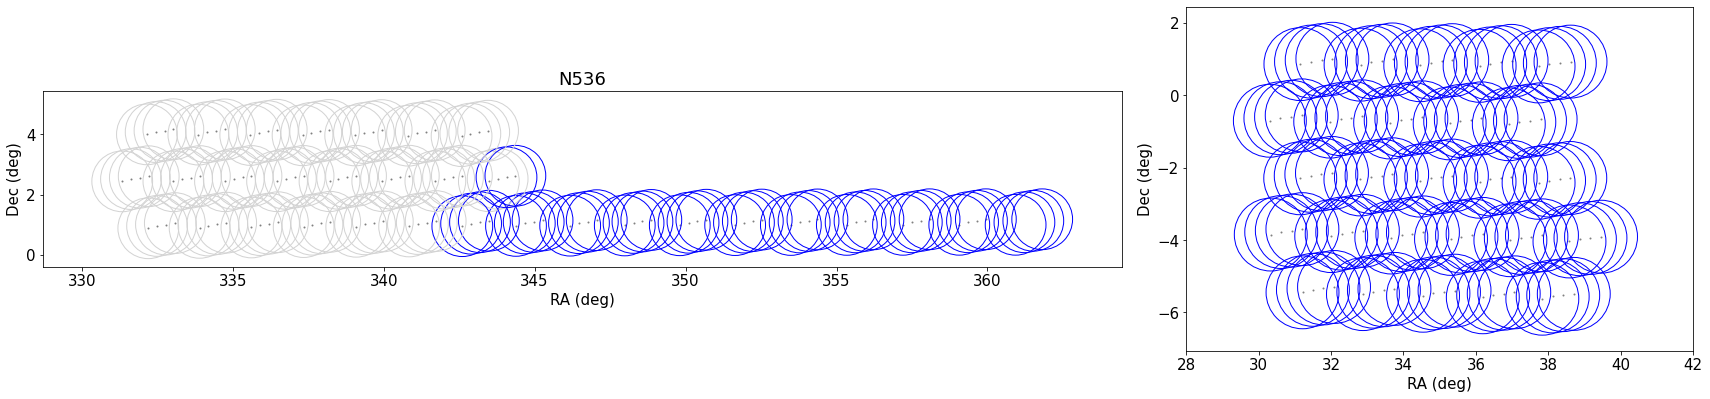

In [17]:
fig = plt.figure(figsize=(24,8))
fov_radius = (3.18/np.pi)**0.5
shp = (1,3)
ax0 = plt.subplot2grid(shp, (0,0), colspan=2)
ax1 = plt.subplot2grid(shp, (0,2) )
for name,row in mastercat_n536.iterrows():
    qrow = iqt_n536.loc[name]
    if (row.RA > 50):
        ax = ax0
        ra = row.RA
    elif row.RA < 10:
        ax = ax0
        ra = row.RA + 360.
    else:
        ax = ax1
        ra = row.RA
    if qrow.is_queued:
        cval = np.where(iqt_n536.sort_values('qstamp').index == name)[0][0]
        ec= 'b'#plt.cm.viridis( cval/iqt_n536.shape[0] )
    else:
        ec='lightgray'
    patch = patches.Circle ( (ra, row.dec), fov_radius, ec=ec, #plt.cm.viridis((hr+5)/10.), 
                            fc='None')
    
    ax.add_patch(patch)

mask = (mastercat.RA > 50)
ax0.scatter(mastercat.loc[mask,'RA'], mastercat.loc[mask,'dec'], s=1, color='grey')
ax0.set_aspect('equal')
ax1.scatter(mastercat.loc[~mask,'RA'], mastercat.loc[~mask,'dec'], s=1, color='grey')
ax1.set_xlim(28.,42.)
ax1.set_aspect('equal')
ax0.set_title('N536')
for ax in [ax0,ax1]:
    ax.set_xlabel('RA (deg)')
    ax.set_ylabel('Dec (deg)')
plt.tight_layout ()
#plt.savefig('/Users/kadofong/Downloads/n536_map.png')

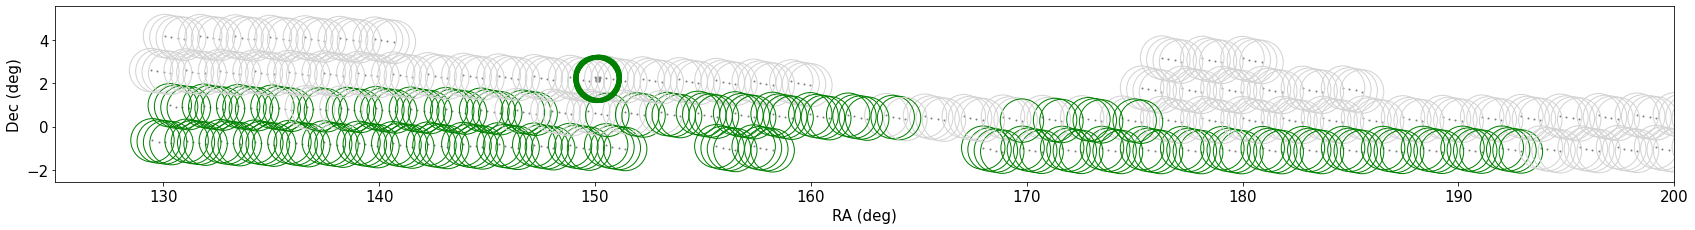

In [18]:
fig = plt.figure(figsize=(24,8))
fov_radius = (3.18/np.pi)**0.5

ax = plt.subplot(111)

for name,row in mastercat_cosmosgama.iterrows():
    qrow = iqt_cosmosgama_n536.loc[name]
    if qrow.is_queued:
        cval = np.where(iqt_cosmosgama_n536.sort_values('qstamp').index == name)[0][0]
        ec= 'green' #plt.cm.viridis( cval/iqt_cosmosgama_n536.query('is_queued').shape[0] )
    else:
        ec='lightgray'
    patch = patches.Circle ( (row.RA, row.dec), fov_radius, ec=ec, #plt.cm.viridis((hr+5)/10.), 
                            fc='None')
    
    ax.add_patch(patch)



ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')
ax.scatter ( mastercat_cosmosgama['RA'], mastercat_cosmosgama['dec'], s=1, color='grey' )
ax.set_xlim(125,200)

ax.set_aspect('equal')
plt.tight_layout ()
#plt.savefig('/Users/kadofong/Downloads/n536_map.png')

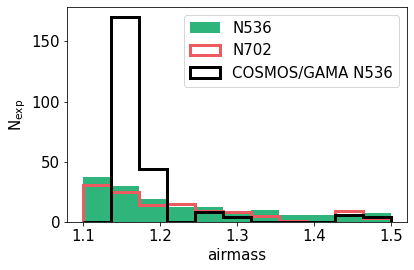

In [19]:
bins = np.linspace(1.1,1.5,12)
plt.hist(iqt_n536.airmass.astype(float), bins=bins,
         color=plt.cm.viridis(0.65), label='N536')
plt.hist(iqt_n702.airmass.astype(float), bins=bins,
         color=plt.cm.magma(0.65), histtype='step', lw=3, label='N702')
plt.hist(iqt_cosmosgama_n536.airmass.astype(float), bins=bins,
         color='k', histtype='step', lw=3, label='COSMOS/GAMA N536')
plt.legend()
plt.xlabel('airmass')
plt.ylabel(r'N$_{\rm exp}$')
plt.tight_layout ()
plt.savefig('/Users/kadofong/Downloads/airmass.png')

In [20]:
print(f"{iqt_cosmosgama_n536.query('is_queued').shape[0]} exposures queued for COSMOS/GAMA N536")
print(f"{iqt_n536.query('is_queued').shape[0]} exposures queued for VVDS/XMM N536")
print(f"{iqt_n702.query('is_queued').shape[0]} exposures queued for VVDS/XMM N702")
ntot = iqt_cosmosgama_n536.query('is_queued').shape[0]
ntot += iqt_n536.query('is_queued').shape[0]
ntot += iqt_n702.query('is_queued').shape[0]
print('--------------------')
print(f'{ntot} exposures queued in total')

236 exposures queued for COSMOS/GAMA N536
150 exposures queued for VVDS/XMM N536
120 exposures queued for VVDS/XMM N702
--------------------
506 exposures queued in total
